In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
# Agregar el dataset 'survey_results_public.csv' en el directorio data/
df = pd.read_csv('data/survey_results_public.csv')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [122]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [123]:
ATTRS = ['Age', 'MainBranch', 'CompFreq', 'ConvertedComp', 'Country', 'DevType', 
           'EdLevel', 'Employment', 'Gender', 'JobSeek', 'NEWOnboardGood', 
           'NEWOvertime', 'OpSys', 'OrgSize', 'Sexuality', 'WorkWeekHrs', 'YearsCodePro',
          'JobSat']

df = df[ATTRS]

In [124]:
# Only developers by profession.
df = df[df['MainBranch'] == 'I am a developer by profession']
df.drop('MainBranch', 1, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47193 entries, 0 to 64159
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             34348 non-null  float64
 1   CompFreq        36310 non-null  object 
 2   ConvertedComp   31581 non-null  float64
 3   Country         47008 non-null  object 
 4   DevType         41733 non-null  object 
 5   EdLevel         42781 non-null  object 
 6   Employment      46930 non-null  object 
 7   Gender          37592 non-null  object 
 8   JobSeek         40376 non-null  object 
 9   NEWOnboardGood  38498 non-null  object 
 10  NEWOvertime     39032 non-null  object 
 11  OpSys           41521 non-null  object 
 12  OrgSize         40048 non-null  object 
 13  Sexuality       33220 non-null  object 
 14  WorkWeekHrs     37203 non-null  float64
 15  YearsCodePro    41087 non-null  object 
 16  JobSat          40764 non-null  object 
dtypes: float64(3), object(14)
memor

### Edad

In [126]:
# Age procces
df[df['Age'] > 100] = None
df[df['Age'] < 16] = None

### CompFreq

In [127]:
df['CompFreq'].value_counts()

Yearly     17957
Monthly    17136
Weekly      1201
Name: CompFreq, dtype: int64

### ConvertedComp

In [128]:
# Esta ok hay algunos casos medio raro de 1M y 2M de USD.

### Country

In [129]:
# Que carajos hacemos aca. :)

### EdLevel

In [130]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          21677
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10814
Some college/university study without earning a degree                                 4888
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1921
Associate degree (A.A., A.S., etc.)                                                    1379
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1004
Professional degree (JD, MD, etc.)                                                      577
I never completed any formal education                                                  284
Primary/elementary school                                                               216
Name: EdLevel, dtype: int64

### Employment

In [131]:
df['Employment'].value_counts()

def clasificar_employment(row):
    employment = row['Employment']
    if isinstance(employment, str):
        if employment == "Employed full-time":
            return "FullTime"
        elif employment == "Independent contractor, freelancer, or self-employed":
            return "Freelance"
        return "PartTime"

df['Employment'] = df.apply(clasificar_employment, axis = 1)

In [132]:
df['Employment'].value_counts()

FullTime     39189
Freelance     4449
PartTime      3269
Name: Employment, dtype: int64

### Gender

<AxesSubplot:title={'center':'Genero'}>

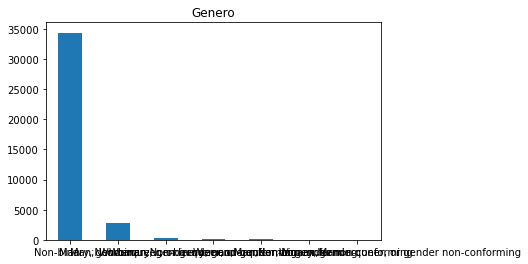

In [133]:
df['Gender'].value_counts().plot(kind = 'bar', rot=0, title='Genero')

In [134]:
df.drop('Gender', 1, inplace=True)

### JobSeek

In [135]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    23463
I am not interested in new job opportunities                    10778
I am actively looking for a job                                  6111
Name: JobSeek, dtype: int64

In [136]:
def clasificar_jobseek(row):
    seek = row['JobSeek']
    if isinstance(seek, str):
        if "I’m not actively looking" in seek:
            return "No, but open to apportunities"
        elif "I am not interested in new job opportunities" in seek:
            return "No"
        return "Yes"

df['JobSeek'] = df.apply(clasificar_jobseek, axis = 1)
df['LookingForJob'] = df['JobSeek']
df.drop('JobSeek', 1, inplace=True)

In [137]:
df['LookingForJob'].value_counts()

No, but open to apportunities    23463
No                               10778
Yes                               6111
Name: LookingForJob, dtype: int64

### NEWOnboardGood

In [138]:
df['NEWOnboardGood'].value_counts()

Yes                             18965
No                              11338
Onboarding? What onboarding?     8179
Name: NEWOnboardGood, dtype: int64

In [139]:
df[df['NEWOnboardGood'] == "Onboarding? What onboarding?"] = None

In [140]:
df['NEWOnboardGood'].value_counts()

Yes    18965
No     11338
Name: NEWOnboardGood, dtype: int64

### NEWOvertime

In [141]:
df['NEWOvertime'].value_counts()

Sometimes: 1-2 days per month but less than weekly          8257
Often: 1-2 days per week or more                            7227
Occasionally: 1-2 days per quarter but less than monthly    7052
Rarely: 1-2 days per year or less                           4870
Never                                                       3471
Name: NEWOvertime, dtype: int64

In [142]:
def clasificar_overtime(row):
    overtime = row['NEWOvertime']
    if isinstance(overtime, str):
        if "1-2 days per month but less than weekly" in overtime:
            return "Sometimes"
        elif "1-2 days per week or more" in overtime:
            return "Often"
        elif "1-2 days per quarter but less than monthly" in overtime:
            return "Occasionally"
        elif "1-2 days per year or less" in overtime:
            return "Rarely"
        return "Never"

df['NEWOvertime'] = df.apply(clasificar_overtime, axis = 1)

In [143]:
df['NEWOvertime'].value_counts()

Sometimes       8257
Often           7227
Occasionally    7052
Rarely          4870
Never           3471
Name: NEWOvertime, dtype: int64

### OpSys

In [144]:
df['OpSys'].value_counts()

Windows        14921
MacOS           9857
Linux-based     8855
BSD               24
Name: OpSys, dtype: int64

In [145]:
def op_sys(row):
    op_sys = row['OpSys']
    if isinstance(op_sys, str):
        if ("Linux-based" in op_sys) or ("BSD" in op_sys):
            return "Linux"
        return op_sys

df['OpSys'] = df.apply(op_sys, axis = 1)

In [146]:
df['OpSys'].value_counts()

Windows    14921
MacOS       9857
Linux       8879
Name: OpSys, dtype: int64

### OrgSize

In [147]:
df['OrgSize'].value_counts()

20 to 99 employees                                    7092
100 to 499 employees                                  6419
10,000 or more employees                              4719
1,000 to 4,999 employees                              3642
10 to 19 employees                                    2886
2 to 9 employees                                      2677
500 to 999 employees                                  2234
5,000 to 9,999 employees                              1336
Just me - I am a freelancer, sole proprietor, etc.    1021
Name: OrgSize, dtype: int64

In [148]:
def org_size(row):
    size = row['OrgSize']
    if isinstance(size, str):
        if "I am a freelancer" in size:
            return "Freelancer"
        return size.replace('employees', '').replace(' to ', '-')

df['OrgSize'] = df.apply(org_size, axis = 1)

In [149]:
df['OrgSize'].value_counts()

20-99              7092
100-499            6419
10,000 or more     4719
1,000-4,999        3642
10-19              2886
2-9                2677
500-999            2234
5,000-9,999        1336
Freelancer         1021
Name: OrgSize, dtype: int64

### Sexuality

In [150]:
df['Sexuality'].value_counts()

Straight / Heterosexual                                  24294
Bisexual                                                  1054
Gay or Lesbian                                             575
Bisexual;Straight / Heterosexual                           137
Queer                                                      126
Bisexual;Queer                                             112
Gay or Lesbian;Queer                                        52
Straight / Heterosexual;Queer                               36
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer       16
Bisexual;Gay or Lesbian                                     15
Bisexual;Gay or Lesbian;Queer                               13
Gay or Lesbian;Straight / Heterosexual                       7
Bisexual;Straight / Heterosexual;Queer                       6
Bisexual;Gay or Lesbian;Straight / Heterosexual              3
Name: Sexuality, dtype: int64

### WorkWeekHrs

In [151]:
df['WorkWeekHrs'] = df['WorkWeekHrs'].apply(lambda x: None if x >= 84 else x)

In [152]:
df['WorkWeekHrs'].value_counts()

40.000000    14367
45.000000     2687
50.000000     1794
35.000000     1438
38.000000      963
             ...  
12.500000        1
50.111111        1
69.000000        1
34.500000        1
22.500000        1
Name: WorkWeekHrs, Length: 115, dtype: int64

### YearsCodePro

In [153]:
# More than 50 years --> 51
df.YearsCodePro = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]

### JobSat

In [154]:
# Class in 2 buckets.
# ["Slightly satisfied", "Very satisfied"] -> 1
# ["Very dissatisfied", "Slightly dissatisfied"] -> 0
def job_sat(row):
    job_sat = row["JobSat"]
    sat_labels = ["Slightly satisfied", "Very satisfied"]
    not_sat_labels = ["Very dissatisfied", "Slightly dissatisfied"]
    if isinstance(job_sat, str):
        if job_sat in sat_labels:
            return 1
        elif job_sat in not_sat_labels:
            return 0
        
df['JobSat'] = df.apply(job_sat, axis = 1)
# Drop if JobSat (class) is null.
df.dropna(subset = ["JobSat"], inplace=True)

<AxesSubplot:title={'center':'Cantidad de personas en cada nivel de satisfacción'}>

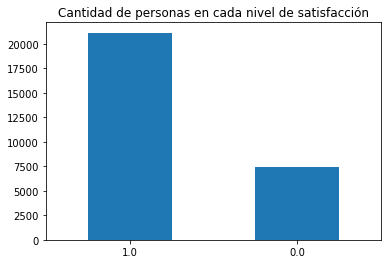

In [155]:
df['JobSat'].value_counts().plot(kind = 'bar', rot=0, title='Cantidad de personas en cada nivel de satisfacción')

In [156]:
# Country
df.dropna(subset = ["Country"], inplace=True)
TOP_COUNTRIES = df['Country'].value_counts().index[:25]
def country(row):
    country = row['Country']
    if isinstance(country, str):
        if country in TOP_COUNTRIES:
            return country
        else:
            return 'Other'

df['Country'] = df.apply(country, axis = 1)

In [157]:
# Set class as last col.
CLASS = 'JobSat'
aux = df[CLASS]
df.drop(CLASS, 1, inplace=True)
df[CLASS] = aux

In [158]:
df.to_csv('data_19Newfeb.csv', index=False)